# **Regression of User Car Price**
###Masmur Toloni Harefa
###Dataset : https://www.kaggle.com/competitions/playground-series-s4e9/


In [ ]:
#Import Neccesary Data Science and Machine Learning Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Import Data

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/MLlearn/usedCar/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/MLlearn/usedCar/test.csv')

train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


#Exploratory Data Analisys


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
train_df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [ ]:
train_df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


In [ ]:
test_df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,3383
engine,0
transmission,0
ext_col,0
int_col,0


In [ ]:
#check missing values and duplicated data
print(f'Missing values in train_df: {train_df.isna().sum().sum()}')
print(f'Duplicated values in train_df: {train_df.duplicated().sum()}')

Missing values in train_df: 28954
Duplicated values in train_df: 0


In [ ]:
#check missing values and duplicated data
print(f'Missing values in test_df: {test_df.isna().sum().sum()}')
print(f'Duplicated values test_df: {test_df.duplicated().sum()}')

Missing values in test_df: 19254
Duplicated values test_df: 0


In [ ]:
#check numerical data
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['id', 'model_year', 'milage', 'price'], dtype='object')


In [ ]:
#check categorical data
cat_cols = train_df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')


In [ ]:

train_df[cat_cols].nunique()

,0
brand,57
model,1897
fuel_type,7
engine,1117
transmission,52
ext_col,319
int_col,156
accident,2
clean_title,1


#EDA RESULT :

1. Car Brand = 57
2. unique model = 1897
3. fuel_type = 7 unique fuel types but many missing data
4. engine = 1117 unique engine with complicated object-type data --can be engineered--
5. transmission = 52 type of transmission but some similiarity e.g 'A/T' and '7-Speed A/T' --this feature need to be engineered--
6. ext_col(exterior color) = 319 unique color
7. int_col(interior color) = 156 unique
8. accident = binary (recorded or none) but there are some missing values
9. clean_title = binary

#Feature Engineering

##Miscellaneous

In [ ]:
#Drop id column
train_df.drop(columns=['id'], inplace=True)
test_df.drop(columns=['id'], inplace=True)

In [ ]:
# Create column'car_age' feature based on : currentYear - model_year
currentYear = 2025
train_df['car_age'] = currentYear - train_df['model_year']
test_df['car_age'] = currentYear - test_df['model_year']

##**engine** column engineering

In [ ]:
train_df['engine'].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

In [ ]:
# Function to extract horsepower from engine column
import re
def extract_horsepower(engine_str):
    match = re.search(r'(\d+)\.?\d*HP', engine_str)
    return int(match.group(1)) if match else None

# Function to extract engine size from engine column
def extract_engine_size(engine_str):
    match = re.search(r'(\d+\.?\d*)L', engine_str)
    return float(match.group(1)) if match else None

# Function to extract cylinder count from engine column
def extract_cylinder_count(engine_str):
    match = re.search(r'(\d+) Cylinder', engine_str)
    return int(match.group(1)) if match else None

In [ ]:
# Apply the extraction functions to both training and test datasets
train_df['horsepower'] = train_df['engine'].apply(extract_horsepower)
train_df['engine_size'] = train_df['engine'].apply(extract_engine_size)

test_df['horsepower'] = test_df['engine'].apply(extract_horsepower)
test_df['engine_size'] = test_df['engine'].apply(extract_engine_size)

# Apply the extraction function to both training and test datasets
train_df['cylinder_count'] = train_df['engine'].apply(extract_cylinder_count)
test_df['cylinder_count'] = test_df['engine'].apply(extract_cylinder_count)

In [ ]:
# Drop 'engine' column
train_df.drop('engine', axis=1, inplace=True)
test_df.drop('engine', axis=1, inplace=True)

In [ ]:
train_df[['horsepower', 'engine_size', 'cylinder_count']].head()

,horsepower,engine_size,cylinder_count
0,172.0,1.6,4.0
1,252.0,3.9,8.0
2,320.0,5.3,8.0
3,420.0,5.0,8.0
4,208.0,2.0,4.0


##fuel_type engineering

In [ ]:

# Check the unique values again
print(train_df['fuel_type'].unique())
print(test_df['fuel_type'].unique())

['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
['Gasoline' 'Hybrid' 'Diesel' 'E85 Flex Fuel' nan 'Plug-In Hybrid' '–'
 'not supported']


##transmission engineering

In [ ]:

train_df['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [ ]:
# Implementing the extraction of 'Transmission Type' and 'Number of Speeds' for both training and test datasets
def extract_transmission_type(transmission_str):
    if 'Automatic' in transmission_str or 'A/T' in transmission_str:
        return 'Automatic'
    elif 'Manual' in transmission_str or 'M/T' in transmission_str:
        return 'Manual'
    elif 'CVT' in transmission_str:
        return 'CVT'
    else:
        return 'Other'

def extract_speeds(transmission_str):
    match = re.search(r'(\d+)-Speed', transmission_str)
    return int(match.group(1)) if match else None

In [ ]:
# Apply the extraction functions to both the training and test datasets
train_df['transmission_type'] = train_df['transmission'].apply(extract_transmission_type)
train_df['num_speeds'] = train_df['transmission'].apply(extract_speeds)

test_df['transmission_type'] = test_df['transmission'].apply(extract_transmission_type)
test_df['num_speeds'] = test_df['transmission'].apply(extract_speeds)

In [ ]:

# Drop the original 'transmission' column
train_df.drop('transmission', axis=1, inplace=True)
test_df.drop('transmission', axis=1, inplace=True)

In [ ]:
# Inspect the new features in the training data
train_df[['transmission_type', 'num_speeds']].head()


,transmission_type,num_speeds
0,Automatic,NaN
1,Automatic,NaN
2,Automatic,NaN
3,Other,NaN
4,Automatic,7.0


In [ ]:

train_df['transmission_type'].unique()

array(['Automatic', 'Other', 'CVT', 'Manual'], dtype=object)

In [ ]:

train_df['num_speeds'].unique()

array([nan,  7.,  8., 10.,  1.,  6.,  9.,  5.,  4.,  2.])

In [ ]:

print(train_df.isnull().sum())

brand                    0
model                    0
model_year               0
milage                   0
fuel_type             5083
ext_col                  0
int_col                  0
accident              2452
clean_title          21419
price                    0
car_age                  0
horsepower           33259
engine_size          14214
cylinder_count       37855
transmission_type        0
num_speeds           84454
dtype: int64


##Imputing null feature

In [ ]:
from sklearn.impute import SimpleImputer
# Initialize SimpleImputer with strategy='mean' for filling missing values
imputer = SimpleImputer(strategy='mean')

# Selecting the numerical columns that have missing values
numerical_cols_to_impute = ['horsepower', 'engine_size', 'cylinder_count', 'num_speeds']

# Apply the imputer to the selected numerical columns in both train and test datasets
train_df[numerical_cols_to_impute] = imputer.fit_transform(train_df[numerical_cols_to_impute])
test_df[numerical_cols_to_impute] = imputer.transform(test_df[numerical_cols_to_impute])

In [ ]:
# Check if missing values have been filled in the training data
missing_values_after_simple_imputation = train_df[numerical_cols_to_impute].isnull().sum()

# Check if missing values have been filled in the test data
missing_values_test_after_simple_imputation = test_df[numerical_cols_to_impute].isnull().sum()

missing_values_after_simple_imputation, missing_values_test_after_simple_imputation

(horsepower        0
 engine_size       0
 cylinder_count    0
 num_speeds        0
 dtype: int64,
 horsepower        0
 engine_size       0
 cylinder_count    0
 num_speeds        0
 dtype: int64)

In [ ]:

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              188533 non-null  object 
 1   model              188533 non-null  object 
 2   model_year         188533 non-null  int64  
 3   milage             188533 non-null  int64  
 4   fuel_type          183450 non-null  object 
 5   ext_col            188533 non-null  object 
 6   int_col            188533 non-null  object 
 7   accident           186081 non-null  object 
 8   clean_title        167114 non-null  object 
 9   price              188533 non-null  int64  
 10  car_age            188533 non-null  int64  
 11  horsepower         188533 non-null  float64
 12  engine_size        188533 non-null  float64
 13  cylinder_count     188533 non-null  float64
 14  transmission_type  188533 non-null  object 
 15  num_speeds         188533 non-null  float64
dtypes:

##Categorical Features Handling

In [ ]:

cat_cols = train_df.select_dtypes(include=['object']).columns
train_df[cat_cols].nunique()

,0
brand,57
model,1897
fuel_type,7
ext_col,319
int_col,156
accident,2
clean_title,1
transmission_type,4


In [ ]:

train_df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [ ]:

train_df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [ ]:
#impute nan in train_df['clean_title']
train_df['clean_title'] = train_df['clean_title'].fillna('No')

#impute nan in test_df['clean_title']
test_df['clean_title'] = test_df['clean_title'].fillna('No')

In [ ]:
train_df['clean_title'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:

# Encode 'accident' as 0 for 'None reported' and 1 for 'At least 1 accident or damage reported'

mapping = {
    'None reported': 0,
    'At least 1 accident or damage reported': 1
}

# encode accident to mapping
train_df['accident_encoded'] = train_df['accident'].replace('nan', np.nan).map(mapping).fillna(-1).astype(int)
test_df['accident_encoded'] = test_df['accident'].replace('nan', np.nan).map(mapping).fillna(-1).astype(int)

# Encode 'clean_title' as 1 for 'Yes' and 0 for 'No'
train_df['clean_title_encoded'] = train_df['clean_title'].map({'Yes': 1, 'No': 0})
test_df['clean_title_encoded'] = test_df['clean_title'].map({'Yes': 1, 'No': 0})

In [ ]:
# prompt: check unique in accident_encoded

train_df['accident_encoded'].unique()

array([ 0,  1, -1])

In [ ]:

train_df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [ ]:

train_df['transmission_type'].unique()

array(['Automatic', 'Other', 'CVT', 'Manual'], dtype=object)

In [ ]:
# Initialize the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to 'fuel_type'
train_df['fuel_type_encoded'] = le.fit_transform(train_df['fuel_type'])
test_df['fuel_type_encoded'] = le.transform(test_df['fuel_type'])

# Apply Label Encoding to 'transmission_type'
train_df['transmission_type_encoded'] = le.fit_transform(train_df['transmission_type'])
test_df['transmission_type_encoded'] = le.transform(test_df['transmission_type'])

In [ ]:
# Drop the original columns as they are now encoded
train_df.drop(['fuel_type', 'transmission_type', 'accident', 'clean_title'], axis=1, inplace=True)
test_df.drop(['fuel_type', 'transmission_type', 'accident', 'clean_title'], axis=1, inplace=True)

In [ ]:
# Inspect the first few rows of the updated train_data
train_df[['fuel_type_encoded', 'transmission_type_encoded', 'accident_encoded', 'clean_title_encoded']].head()

,fuel_type_encoded,transmission_type_encoded,accident_encoded,clean_title_encoded
0,2,0,0,1
1,2,0,1,1
2,1,0,0,1
3,2,3,0,1
4,2,0,0,1


In [ ]:

# Frequency Encoding for high-cardinality categorical columns

# List of columns to apply Frequency Encoding
high_cardinality_cols = ['brand', 'model', 'ext_col', 'int_col']

for col in high_cardinality_cols:
    # Calculate frequency of each category in the training dataset
    freq_encoding = train_df[col].value_counts(normalize=True)

    # Map the frequency encoding to the training data
    train_df[f'{col}_encoded'] = train_df[col].map(freq_encoding)

    # Map the same encoding to the test data
    test_df[f'{col}_encoded'] = test_df[col].map(freq_encoding)

In [ ]:

# Drop the original high-cardinality categorical columns
train_df.drop(high_cardinality_cols, axis=1, inplace=True)
test_df.drop(high_cardinality_cols, axis=1, inplace=True)

In [ ]:

# Inspect the encoded columns in the training data
encoded_cols = [f'{col}_encoded' for col in high_cardinality_cols]
train_df[encoded_cols].head()

,brand_encoded,model_encoded,ext_col_encoded,int_col_encoded
0,0.005644,0.003066,0.005187,0.112468
1,0.012852,0.000154,0.090143,0.129924
2,0.086643,0.000329,0.077201,0.112468
3,0.005140,0.000504,0.258087,0.571115
4,0.101690,0.002763,0.258087,0.129924


In [ ]:

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   model_year                 188533 non-null  int64  
 1   milage                     188533 non-null  int64  
 2   price                      188533 non-null  int64  
 3   car_age                    188533 non-null  int64  
 4   horsepower                 188533 non-null  float64
 5   engine_size                188533 non-null  float64
 6   cylinder_count             188533 non-null  float64
 7   num_speeds                 188533 non-null  float64
 8   accident_encoded           188533 non-null  int64  
 9   clean_title_encoded        188533 non-null  int64  
 10  fuel_type_encoded          188533 non-null  int64  
 11  transmission_type_encoded  188533 non-null  int64  
 12  brand_encoded              188533 non-null  float64
 13  model_encoded              18

In [ ]:


print(train_df.isnull().sum())

model_year                   0
milage                       0
price                        0
car_age                      0
horsepower                   0
engine_size                  0
cylinder_count               0
num_speeds                   0
accident_encoded             0
clean_title_encoded          0
fuel_type_encoded            0
transmission_type_encoded    0
brand_encoded                0
model_encoded                0
ext_col_encoded              0
int_col_encoded              0
dtype: int64


In [ ]:

print(train_df['accident_encoded'].unique())

[ 0  1 -1]


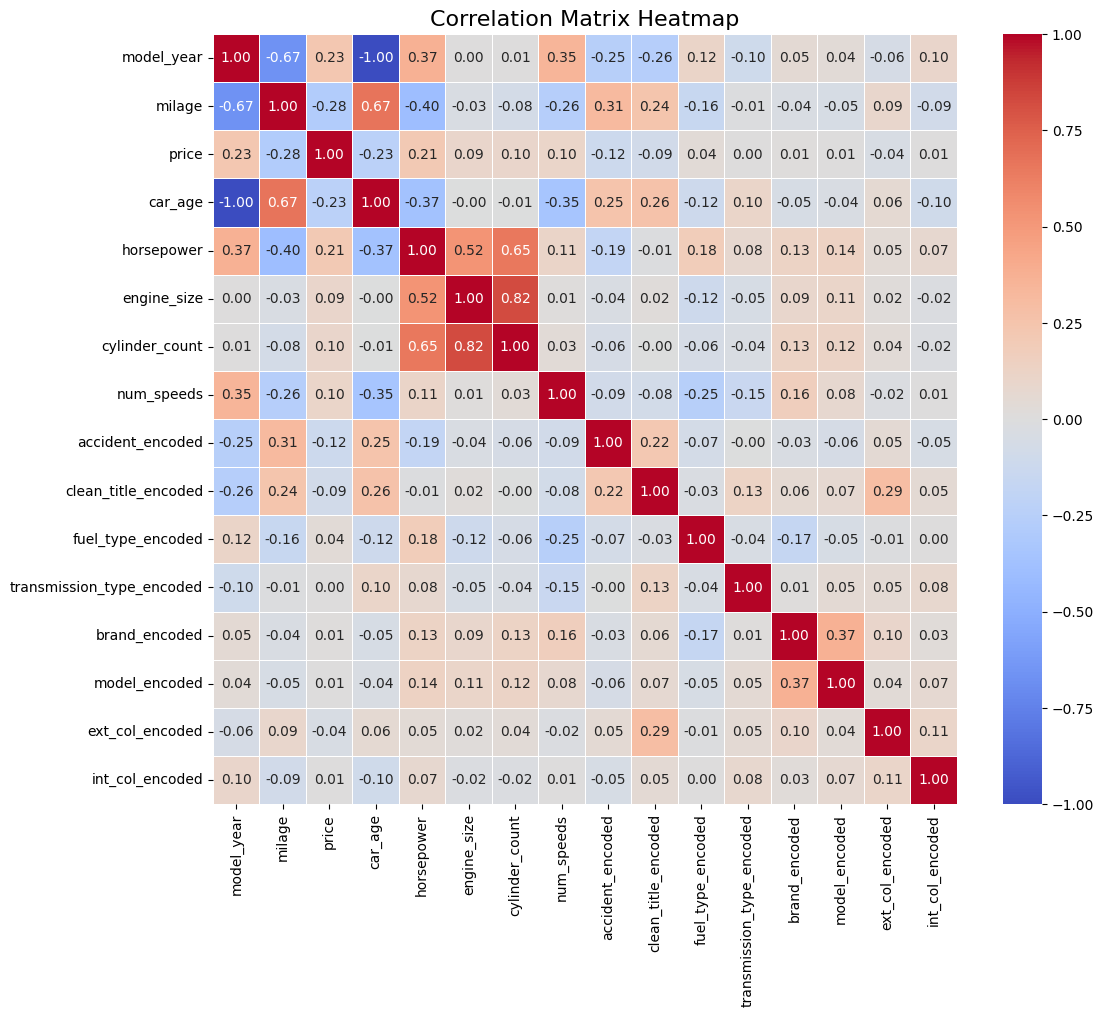

In [ ]:
#Corr matrix
corr= train_df.corr()


# Set the size of the plot
plt.figure(figsize=(12, 10))

# Generate a heatmap with correlation values
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', size=16)
plt.show()

#Model Training

In [ ]:
#Seperate feature and label
X = train_df.drop('price', axis=1)
y = train_df['price']

In [ ]:
# Split into train and val dataset

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

X_train.shape, X_val.shape

((150826, 15), (37707, 15))

##Random Forest


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error


#base model
rf = RandomForestRegressor(random_state=42)


#parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'max_features': ['log2', 'sqrt']
}


# === Grid search dengan cross-validation dan sample_weight
model_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=3,
)
model_rf.fit(X_train, y_train)

# best model for rf
best_rf = model_rf.best_estimator_
y_pred_rf = best_rf.predict(X_val)

# Evaluation
r2 = r2_score(y_val, y_pred_rf)
rmse = mean_squared_error(y_val, y_pred_rf)
wmse = np.average((y_val - y_pred_rf) ** 2,)

print(f"Best Parameters: {model_rf.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"WMSE: {wmse:.4f}")



Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.114 total time=   3.8s
[CV 2/3] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.117 total time=   3.9s
[CV 3/3] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.120 total time=   5.0s
[CV 1/3] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.114 total time=   7.4s
[CV 2/3] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.117 total time=   8.7s
[CV 3/3] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.120 total time=   8.1s
[CV 1/3] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.114 total 

##XGBoost


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# === Base model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# === Parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# === Grid search CV
model_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='r2',
    verbose=3,
)

# fit to train
model_xgb.fit(X_train, y_train)

#Best model
best_xgb = model_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_val)

#Evaluation
r2_xgb = r2_score(y_val, y_pred_xgb)
rmse_xgb = mean_squared_error(y_val, y_pred_xgb)
wmse_xgb = np.average((y_val - y_pred_xgb) ** 2)

print(f"Best Parameters: {model_xgb.best_params_}")
print(f"R² Score: {r2_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"WMSE: {wmse_xgb:.4f}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8;, score=0.135 total time=   0.8s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8;, score=0.136 total time=   0.7s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8;, score=0.139 total time=   0.8s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0;, score=0.136 total time=   0.7s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0;, score=0.135 total time=   0.7s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0;, score=0.140 total time=   0.7s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8;, score=0.139 total time=   1.2s
[CV 2/3]

##CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.3 MB/s eta 0:00:00


In [ ]:

from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Base model CatBoost
catboost_model = CatBoostRegressor(
    verbose=0,        # Supaya output training tidak terlalu ramai
    random_state=42
)

# Parameter grid untuk tuning
param_grid = {
    'iterations': [100, 200],
    'depth': [4, 8],
    'learning_rate': [0.03, 0.1],
    'l2_leaf_reg': [1, 3]
}

# Grid search dengan cross-validation
model_cb = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=3,

)

# Fit model
model_cb.fit(X_train, y_train)

# Best model dari grid search
best_cb = model_cb.best_estimator_
y_pred_cb = best_cb.predict(X_val)

# Evaluasi performa
r2_cb = r2_score(y_val, y_pred_cb)
rmse_cb = mean_squared_error(y_val, y_pred_cb)
wmse_cb = np.average((y_val - y_pred_cb) ** 2)

# Print hasil
print(f"Best Parameters: {model_cb.best_params_}")
print(f"R² Score: {r2_cb:.4f}")
print(f"RMSE: {rmse_cb:.4f}")
print(f"WMSE: {wmse_cb:.4f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.03;, score=0.128 total time=   4.0s
[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.03;, score=0.129 total time=   5.9s
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.03;, score=0.131 total time=   2.8s
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1;, score=0.138 total time=   1.6s
[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1;, score=0.141 total time=   1.6s
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1;, score=0.141 total time=   1.8s
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=3, learning_rate=0.03;, score=0.128 total time=   4.0s
[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=3, learning_rate=0.03;, score=0.129 total time=   1.6s
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=3, learning_rate=0.03;, score=0.131 total time=   1.

In [ ]:
#Compare RMSE :
print(f"RMSE for RandomForest: {rmse:.4f}")
print(f"RMSE for XGBoost : {rmse_xgb:.4f}")
print(f"RMSE for CatBoost: {rmse_cb:.4f}")



RMSE for RandomForest: 5222747851.8246
RMSE for XGBoost : 5199268864.0000
RMSE for CatBoost: 5201972686.8167


**Conclusion**

XGBoost is the best *model*

#Final Model : XGBOOST


In [ ]:
sub_df = pd.read_csv('/content/drive/MyDrive/MLlearn/usedCar/sample_submission.csv')
sub_df.head()

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016


In [ ]:
# Train the best model on the full training dataset
best_model = best_xgb
best_model.fit(X, y)

# Make predictions on the test set
test_predictions = best_model.predict(test_df)

submission = pd.DataFrame({
    'id': sub_df['id'],
    'price': test_predictions
})

# Print the head of the submission file
submission.head()

,id,price
0,188533,16849.833984
1,188534,81120.820312
2,188535,54686.105469
3,188536,29958.392578
4,188537,27833.119141


In [ ]:


# Define the submission file path in Google Drive
submission_path = '/content/drive/MyDrive/MLlearn/usedCar/submission.csv'

# Save the submission dataframe to a CSV file in Google Drive
submission.to_csv(submission_path, index=False)

print(f"Submission file saved to: {submission_path}")

Submission file saved to: /content/drive/MyDrive/MLlearn/usedCar/submission.csv
